In [2]:
options(warn = -1)
options(repr.plot.width=15, repr.plot.height=9) 
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8")

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

## 서울시 지하철 이용객수와 유/무임 승차 정보를 가져와 비교를하자

### 가설
- 이용객이 많은 호선이면 무임승차 비율도 높을것이다

In [3]:

# 필요한 데이터 .csv 파일 가져오기 
# 이용객수 데이터
use <- read.csv("./Data/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv")
head(use)
tail(use)

# 유/무임승차 데이터
pay <- read.csv("./Data/서울시 지하철 호선별 역별 유_무임 승하차 인원 정보.csv")
head(pay)
tail(pay)

# 이거 데이터가 일부 역만 있어서 폐기
# 역별 교통약자 편의시설 데이터
#system <- read.csv("./Data/서울시 지하철 역사 노약자 장애인 편의시설 현황.csv")
#head(system)

# 지하철 범죄
# 계흭 변경으로 사용 x 
#crim <- read.csv("./Data/경찰청 서울특별시경찰청_최근 5년간 지하철성범죄 현황_20221021.csv")
#crim <- head(crim,5)
#crim



,사용월,호선명,지하철역,X04시.05시.승차인원,X04시.05시.하차인원,X05시.06시.승차인원,X05시.06시.하차인원,X06시.07시.승차인원,X06시.07시.하차인원,X07시.08시.승차인원,...,X23시.24시.하차인원,X00시.01시.승차인원,X00시.01시.하차인원,X01시.02시.승차인원,X01시.02시.하차인원,X02시.03시.승차인원,X02시.03시.하차인원,X03시.04시.승차인원,X03시.04시.하차인원,작업일자
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,202402,1호선,동대문,701,8,9527,1753,7632,5598,11791,...,8195,682,2719,4,226,0,0,0,0,20240303
2,202402,1호선,동묘앞,182,2,2391,775,3042,3999,6763,...,3988,138,2107,3,275,0,0,0,0,20240303
3,202402,1호선,서울역,578,17,6983,7715,11521,49271,36199,...,12382,4115,3348,79,199,0,0,0,0,20240303
4,202402,1호선,시청,74,2,1878,4266,3581,20312,6851,...,3487,563,1003,8,40,0,0,0,0,20240303
5,202402,1호선,신설동,313,25,7586,1784,8387,7403,18494,...,7942,334,2370,5,36,0,0,0,0,20240303
6,202402,1호선,제기동,367,10,4382,1975,7771,7619,18300,...,5752,174,1595,0,35,0,0,0,0,20240303


,사용월,호선명,지하철역,X04시.05시.승차인원,X04시.05시.하차인원,X05시.06시.승차인원,X05시.06시.하차인원,X06시.07시.승차인원,X06시.07시.하차인원,X07시.08시.승차인원,...,X23시.24시.하차인원,X00시.01시.승차인원,X00시.01시.하차인원,X01시.02시.승차인원,X01시.02시.하차인원,X02시.03시.승차인원,X02시.03시.하차인원,X03시.04시.승차인원,X03시.04시.하차인원,작업일자
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
64959,201501,중앙선,용문,134,1,702,5,1769,488,4636,...,1462,2,1338,0,0,0,0,0,0,20151223
64960,201501,중앙선,운길산,0,0,177,56,642,403,1292,...,633,3,222,0,0,0,0,0,0,20151223
64961,201501,중앙선,원덕,1,0,292,4,415,46,537,...,383,3,157,0,0,0,0,0,0,20151223
64962,201501,중앙선,중랑,14,1,4929,424,8539,2084,22160,...,6501,86,1617,0,0,0,0,0,0,20151223
64963,201501,중앙선,팔당,0,0,161,50,368,149,1227,...,336,8,85,0,0,0,0,0,0,20151223
64964,201501,중앙선,회기,436,3,10929,3067,23317,10430,65043,...,35702,767,9314,0,0,0,0,0,0,20151223


,사용월,호선명,지하철역,유임승차인원,무임승차인원,유임하차인원,무임하차인원,작업일자
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
1,202402,1호선,청량리(서울시립대입구),350437,266447,340983,268232,20240303
2,202402,1호선,동대문,224713,113712,225306,113175,20240303
3,202402,1호선,동대문,224713,113712,225306,113175,20240303
4,202402,1호선,종로5가,437773,224009,426719,215887,20240303
5,202402,1호선,시청,589874,82025,590697,79839,20240303
6,202402,1호선,제기동,215365,254164,207846,271449,20240303


,사용월,호선명,지하철역,유임승차인원,무임승차인원,유임하차인원,무임하차인원,작업일자
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
66634,201501,9호선,신반포,69980,71893,19347,19689,20150206
66635,201501,9호선,고속터미널,388081,429180,43679,45328,20150206
66636,201501,9호선,사평,70919,67069,14085,13931,20150206
66637,201501,9호선,개화,148155,88699,27453,19874,20150206
66638,201501,9호선,당산,422698,384841,54179,49891,20150206
66639,201501,9호선,여의도,470992,470497,33396,30654,20150206


In [4]:
cat("호선별 승차하 인원\n")
str(use)
summary(use)
cat("\n---------------------------------------------------------------------------------------------------------\n")
cat("호선별 유/무임승하차 인원\n")
str(pay)
summary(pay)

호선별 승차하 인원


'data.frame':	64964 obs. of  52 variables:
 $ 사용월             : int  202402 202402 202402 202402 202402 202402 202402 202402 202402 202402 ...
 $ 호선명             : chr  "1호선" "1호선" "1호선" "1호선" ...
 $ 지하철역           : chr  "동대문" "동묘앞" "서울역" "시청" ...
 $ X04시.05시.승차인원: int  701 182 578 74 313 367 133 140 20 859 ...
 $ X04시.05시.하차인원: int  8 2 17 2 25 10 1 6 1 44 ...
 $ X05시.06시.승차인원: int  9527 2391 6983 1878 7586 4382 3352 3314 1641 9224 ...
 $ X05시.06시.하차인원: int  1753 775 7715 4266 1784 1975 5021 2291 2969 2217 ...
 $ X06시.07시.승차인원: int  7632 3042 11521 3581 8387 7771 3756 3059 2505 15287 ...
 $ X06시.07시.하차인원: int  5598 3999 49271 20312 7403 7619 25760 10241 13775 9017 ...
 $ X07시.08시.승차인원: int  11791 6763 36199 6851 18494 18300 5665 4854 4998 40843 ...
 $ X07시.08시.하차인원: int  9429 5793 100524 62024 19718 17877 98742 22718 35692 14392 ...
 $ X08시.09시.승차인원: int  16768 11434 66412 9187 26900 29039 9488 7694 8487 51630 ...
 $ X08시.09시.하차인원: int  16592 12761 217982 179479 48773 34339 245265 59

     사용월          호선명            지하철역         X04시.05시.승차인원
 Min.   :201501   Length:64964       Length:64964       Min.   :    0.0    
 1st Qu.:201706   Class :character   Class :character   1st Qu.:    4.0    
 Median :201909   Mode  :character   Mode  :character   Median :   21.0    
 Mean   :201925                                         Mean   :  201.6    
 3rd Qu.:202112                                         3rd Qu.:  111.0    
 Max.   :202402                                         Max.   :13585.0    
 X04시.05시.하차인원 X05시.06시.승차인원 X05시.06시.하차인원
 Min.   :  0.000     Min.   :    0       Min.   :    0      
 1st Qu.:  0.000     1st Qu.: 1424       1st Qu.:  387      
 Median :  0.000     Median : 3359       Median :  890      
 Mean   :  2.899     Mean   : 5138       Mean   : 1300      
 3rd Qu.:  2.000     3rd Qu.: 6614       3rd Qu.: 1641      
 Max.   :218.000     Max.   :59655       Max.   :15843      
 X06시.07시.승차인원 X06시.07시.하차인원 X07시.08시.승차인원
 Min.   :    0       Min.   :   


---------------------------------------------------------------------------------------------------------
호선별 유/무임승하차 인원
'data.frame':	66639 obs. of  8 variables:
 $ 사용월      : int  202402 202402 202402 202402 202402 202402 202402 202402 202402 202402 ...
 $ 호선명      : chr  "1호선" "1호선" "1호선" "1호선" ...
 $ 지하철역    : chr  "청량리(서울시립대입구)" "동대문" "동대문" "종로5가" ...
 $ 유임승차인원: int  350437 224713 224713 437773 589874 215365 144619 434613 257411 1333948 ...
 $ 무임승차인원: int  266447 113712 113712 224009 82025 254164 142038 268306 110367 188757 ...
 $ 유임하차인원: int  340983 225306 225306 426719 590697 207846 155082 404998 248804 1287436 ...
 $ 무임하차인원: int  268232 113175 113175 215887 79839 271449 144687 249676 107289 180001 ...
 $ 작업일자    : int  20240303 20240303 20240303 20240303 20240303 20240303 20240303 20240303 20240303 20240303 ...


     사용월          호선명            지하철역          유임승차인원    
 Min.   :201501   Length:66639       Length:66639       Min.   :      0  
 1st Qu.:201707   Class :character   Class :character   1st Qu.:  93414  
 Median :201910   Mode  :character   Mode  :character   Median : 203287  
 Mean   :201935                                         Mean   : 290502  
 3rd Qu.:202201                                         3rd Qu.: 374614  
 Max.   :202402                                         Max.   :3266271  
  무임승차인원      유임하차인원      무임하차인원       작업일자       
 Min.   :      0   Min.   :      0   Min.   :     0   Min.   :20150206  
 1st Qu.:  23464   1st Qu.:  75562   1st Qu.: 22298   1st Qu.:20170803  
 Median :  45490   Median : 178064   Median : 42506   Median :20191203  
 Mean   :  76596   Mean   : 268876   Mean   : 55186   Mean   :20194563  
 3rd Qu.:  80950   3rd Qu.: 352364   3rd Qu.: 72014   3rd Qu.:20220303  
 Max.   :3353256   Max.   :3265282   Max.   :400607   Max.   :20240303  

In [5]:
# 지하철 총 이용객수를 정제하자

ncol(use)
nrow(use)

ncol(pay)
nrow(pay)
#head(pay)

paydata <- pay[,-c(6:8)]
paydata<-  paydata[-2,]
paydata

paydata
# 이용한 횟수 컬럼 추가
use$이용수 <- apply(use[,seq(4,51,2)],1,sum)



ncol(use)

[1] 52

[1] 64964

[1] 8

[1] 66639

,사용월,호선명,지하철역,유임승차인원,무임승차인원
,<int>,<chr>,<chr>,<int>,<int>
1,202402,1호선,청량리(서울시립대입구),350437,266447
3,202402,1호선,동대문,224713,113712
4,202402,1호선,종로5가,437773,224009
5,202402,1호선,시청,589874,82025
6,202402,1호선,제기동,215365,254164
7,202402,1호선,동묘앞,144619,142038
8,202402,1호선,종로3가,434613,268306
9,202402,1호선,신설동,257411,110367
10,202402,1호선,서울역,1333948,188757


,사용월,호선명,지하철역,유임승차인원,무임승차인원
,<int>,<chr>,<chr>,<int>,<int>
1,202402,1호선,청량리(서울시립대입구),350437,266447
3,202402,1호선,동대문,224713,113712
4,202402,1호선,종로5가,437773,224009
5,202402,1호선,시청,589874,82025
6,202402,1호선,제기동,215365,254164
7,202402,1호선,동묘앞,144619,142038
8,202402,1호선,종로3가,434613,268306
9,202402,1호선,신설동,257411,110367
10,202402,1호선,서울역,1333948,188757


[1] 53

In [6]:
# 지하철 총 이용객수에 필요없는거 빼기 
        #mainuse <-
       mainuse <- use[,-c(4:52)]

           # mainuse <- use[,-4]
            head(mainuse)

,사용월,호선명,지하철역,이용수
,<int>,<chr>,<chr>,<int>
1,202402,1호선,동대문,338425
2,202402,1호선,동묘앞,286657
3,202402,1호선,서울역,1522705
4,202402,1호선,시청,671899
5,202402,1호선,신설동,367778
6,202402,1호선,제기동,469529


In [7]:
# 중복 호선 합치기 필요함


unique(use$`호선명`)
unique(pay$`호선명`)

length(mainuse$`호선명`)
# 9호선 만 필요하다 다른 9호선2~3단계는 9호선에서 일부분인 데이터일 뿐이다
#mainuse[mainuse$`호선명` == '9호선2~3단계', ]
#mainuse[mainuse$`호선명` == '9호선', ]
#mainuse[mainuse$`호선명` == '9호선2단계', ]

mainuse <- subset(mainuse, 호선명 != '9호선2~3단계')
mainuse
#64145
mainuse <- subset(mainuse, 호선명 != '9호선2단계')
mainuse
length(mainuse$`호선명`)
#63920

#aa[c(1,2)] <- colnames(c("dddx","123232"))
paydata$`사용월` <- substring(paydata$사용월, 1, 4)
head(paydata)
mainuse$`사용월` <- substring(mainuse$사용월, 1, 4)
mainuse
mainuse  <- mainuse[,-3]
mainuse

[1] "1호선"          "2호선"          "3호선"          "4호선"         
 [5] "5호선"          "6호선"          "7호선"          "8호선"         
 [9] "9호선"          "9호선2~3단계"   "경강선"         "경부선"        
[13] "경원선"         "경의선"         "경인선"         "경춘선"        
[17] "공항철도 1호선" "과천선"         "분당선"         "서해선"        
[21] "수인선"         "신림선"         "안산선"         "우이신설선"    
[25] "일산선"         "장항선"         "중앙선"         "9호선2단계"

[1] "1호선"          "2호선"          "3호선"          "4호선"         
 [5] "5호선"          "6호선"          "7호선"          "8호선"         
 [9] "9호선"          "9호선2~3단계"   "경강선"         "경부선"        
[13] "경원선"         "경의선"         "경인선"         "경춘선"        
[17] "공항철도 1호선" "과천선"         "분당선"         "서해선"        
[21] "수인선"         "신림선"         "안산선"         "우이신설선"    
[25] "일산선"         "장항선"         "중앙선"         "9호선2단계"

[1] 64964

,사용월,호선명,지하철역,이용수
,<int>,<chr>,<chr>,<int>
1,202402,1호선,동대문,338425
2,202402,1호선,동묘앞,286657
3,202402,1호선,서울역,1522705
4,202402,1호선,시청,671899
5,202402,1호선,신설동,367778
6,202402,1호선,제기동,469529
7,202402,1호선,종각,1028064
8,202402,1호선,종로3가,702919
9,202402,1호선,종로5가,661782


,사용월,호선명,지하철역,이용수
,<int>,<chr>,<chr>,<int>
1,202402,1호선,동대문,338425
2,202402,1호선,동묘앞,286657
3,202402,1호선,서울역,1522705
4,202402,1호선,시청,671899
5,202402,1호선,신설동,367778
6,202402,1호선,제기동,469529
7,202402,1호선,종각,1028064
8,202402,1호선,종로3가,702919
9,202402,1호선,종로5가,661782


[1] 63920

,사용월,호선명,지하철역,유임승차인원,무임승차인원
,<chr>,<chr>,<chr>,<int>,<int>
1,2024,1호선,청량리(서울시립대입구),350437,266447
3,2024,1호선,동대문,224713,113712
4,2024,1호선,종로5가,437773,224009
5,2024,1호선,시청,589874,82025
6,2024,1호선,제기동,215365,254164
7,2024,1호선,동묘앞,144619,142038


,사용월,호선명,지하철역,이용수
,<chr>,<chr>,<chr>,<int>
1,2024,1호선,동대문,338425
2,2024,1호선,동묘앞,286657
3,2024,1호선,서울역,1522705
4,2024,1호선,시청,671899
5,2024,1호선,신설동,367778
6,2024,1호선,제기동,469529
7,2024,1호선,종각,1028064
8,2024,1호선,종로3가,702919
9,2024,1호선,종로5가,661782


,사용월,호선명,이용수
,<chr>,<chr>,<int>
1,2024,1호선,338425
2,2024,1호선,286657
3,2024,1호선,1522705
4,2024,1호선,671899
5,2024,1호선,367778
6,2024,1호선,469529
7,2024,1호선,1028064
8,2024,1호선,702919
9,2024,1호선,661782


In [10]:
# 5년 데이터만 뽑기
mainuse <- mainuse[mainuse$`사용월` >= 2020,]
#paydata <- paydata[paydata$`사용월` >= 2020,]
#head(mainuse)
#tail(mainuse)
#mainuse[2]
#tail(mainuse[mainuse$`호선명` == '9호선',])
#grep('9호선', mainuse)
#nrow(mainuse[2])
#mainuse$`사용월` <-  substring(mainuse$사용월, 1, 4)
#mainuse
# 1~ 9호선만 출력하기

#for(i in 1:9) {
        # <- subset(mainuse, 호선명 == paste(i,"호선"))

#}




#aggregate(이용수 ~ 호선명, mainuse, sum) 

#head(mainuse)
#head(paydata)
#tail(mainuse)
#tail(paydata)

datayear <- subset(mainuse, mainuse$`사용월` >= 201902)

twohosun <- subset(datayear, datayear$`호선명` == '2호선')
twohosun
hosun2 <- aggregate( 이용수 ~ 사용월, twohosun, sum)

threehosun <- subset(datayear, datayear$`호선명` == '4호선')
threehosun
hosun4 <- aggregate( 이용수 ~ 사용월, threehosun, sum)
hosun4

guhosun <- subset(datayear, datayear$`호선명` == '9호선')
guhosun
hosun9 <- aggregate( 이용수 ~ 사용월, guhosun, sum)
hosun9
#Data2024 <- lapply(1:9, function(i) subset(data2024, data2024$`호선명` == paste0(i, "호선")))
#for( i in 1:9) {
#aaa <- aggregate(이용수 ~ 호선명, Data2024[i], sum)
#}





,사용월,호선명,이용수
,<chr>,<chr>,<int>
11,2024,2호선,2166674
12,2024,2호선,877199
13,2024,2호선,1004519
14,2024,2호선,773813
15,2024,2호선,1490640
16,2024,2호선,659020
17,2024,2호선,723062
18,2024,2호선,457556
19,2024,2호선,656576


,사용월,호선명,이용수
,<chr>,<chr>,<int>
95,2024,4호선,550212
96,2024,4호선,37011
97,2024,4호선,780268
98,2024,4호선,257309
99,2024,4호선,515890
100,2024,4호선,506613
101,2024,4호선,34888
102,2024,4호선,860239
103,2024,4호선,403867


사용월,이용수
<chr>,<int>
2020,143091253
2021,140561197
2022,158029622
2023,177049585
2024,28502313


,사용월,호선명,이용수
,<chr>,<chr>,<int>
277,2024,9호선,585429
278,2024,9호선,70652
279,2024,9호선,420414
280,2024,9호선,80918
281,2024,9호선,29281
282,2024,9호선,409249
283,2024,9호선,217176
284,2024,9호선,124815
285,2024,9호선,674966


사용월,이용수
<chr>,<int>
2020,75789211
2021,79144963
2022,89484922
2023,97333692
2024,15785203


In [9]:
# 여기 안썻음
# 머지해보자
    #dataAll <- 
    useAll <- merge(mainuse, paydata, by = c("사용월", "호선명","지하철역"), all = TRUE)
    head(useAll)





# 1 호선만 뽑아보자
 #aaa  <-  mainuse[mainuse$`호선명` == '1호선',]
 # 년도만 나오게 하자
#mainuse <- 



#aggregate(이용수 ~ 사용월, mainuse, sum)

#h1o <- aggregate(이용수 ~ 사용월, aaa, sum)
#h1o


ERROR: Error in fix.by(by.x, x): 'by' must specify a uniquely valid column


In [ ]:
# 이 방법으로 안함
# 2~ 9호선 뽑자...
result <- data.frame()
   for(i in 2:9) {
    temp <- mainuse[mainuse$`호선명` == paste0(i, "호선"), ]
    result <- rbind(result, temp)

}
 


result[]

#h29o <- aggregate(이용수 ~ 사용월, result, sum)
#h29o

,사용월,호선명,이용수
,<chr>,<chr>,<int>
11,2024,2호선,2166674
12,2024,2호선,877199
13,2024,2호선,1004519
14,2024,2호선,773813
15,2024,2호선,1490640
16,2024,2호선,659020
17,2024,2호선,723062
18,2024,2호선,457556
19,2024,2호선,656576


In [11]:
# 테스트용으로 1호선만 먼저 뽑아봄
# 1호선만 일단 뽑은거
class(h1o)
options(scipen = 100)
par(family = "AppleGothic", bg = 'white') 
par(bg = 'white')
plot(h1o$`사용월`,h1o$`이용수`/1000000,
      type = 'l',
      col = 'blue',
      ylab = "이용수 (단위:10만명)",
      xlab = "년도",
      

)



ERROR: Error in eval(expr, envir, enclos): 객체 'h1o'를 찾을 수 없습니다


In [ ]:
length(hosun2$`사용월`)

ERROR: Error in eval(expr, envir, enclos): 객체 'hosun2'를 찾을 수 없습니다


In [12]:
# 호선별 이용자수 데이터
hosun2
hosun4
hosun9
# 유/무임승차 데이터
paydata <- subset(paydata,paydata$`사용월` >= 2020)
# 2호선
cat("2호선 년도별 무임승차 인원 데이터")
mudata2 <- subset(paydata, paydata$`호선명` == '2호선') 

hosunmu2 <- aggregate(무임승차인원 ~ 사용월, mudata2, sum)
hosunmu2
cat("4호선 년도별 무임승차 인원 데이터")
# 4호선 
mudata4 <- subset(paydata, paydata$`호선명` == '4호선') 

hosunmu4 <- aggregate(무임승차인원 ~ 사용월, mudata4, sum)
hosunmu4
cat("9호선 년도별 무임승차 인원 데이터")
# 9호선 
mudata9 <- subset(paydata, paydata$`호선명` == '9호선') 

hosunmu9 <- aggregate(무임승차인원 ~ 사용월, mudata9, sum)
hosunmu9

 # 호선별 유/무임승차 비율 
#paydata

  biyul <- apply(paydata[4],2, sum )  / apply(paydata[5],2, sum )
  biyul


사용월,이용수
<chr>,<int>
2020,397139151
2021,391591285
2022,441861856
2023,481049461
2024,77384279


사용월,이용수
<chr>,<int>
2020,143091253
2021,140561197
2022,158029622
2023,177049585
2024,28502313


사용월,이용수
<chr>,<int>
2020,75789211
2021,79144963
2022,89484922
2023,97333692
2024,15785203


2호선 년도별 무임승차 인원 데이터

사용월,무임승차인원
<chr>,<int>
2020,45255901
2021,46862331
2022,58169517
2023,58838286
2024,14030639


4호선 년도별 무임승차 인원 데이터

사용월,무임승차인원
<chr>,<int>
2020,24417915
2021,25196122
2022,31385199
2023,32471502
2024,7889481


9호선 년도별 무임승차 인원 데이터

사용월,무임승차인원
<chr>,<int>
2020,9913095
2021,10698586
2022,13424751
2023,13888372
2024,3362042


유임승차인원 
    4.878412

In [16]:
# 두 데이터프레임 병합
#hosun2Data <-
# 2호선 병합
cat("2호선 병합된 데이터")
hosun2Data <- merge(hosun2, hosunmu2, by = "사용월")
hosun2Data
# 4호선 병합
cat("4호선 병합된 데이터")
hosun4Data <- merge(hosun4, hosunmu4, by = "사용월")
hosun4Data
# 9호선 병합
cat("9호선 병합된 데이터")
hosun9Data <- merge(hosun9, hosunmu9, by = "사용월")
hosun9Data


2호선 병합된 데이터

사용월,이용수,무임승차인원
<chr>,<int>,<int>
2020,397139151,45255901
2021,391591285,46862331
2022,441861856,58169517
2023,481049461,58838286
2024,77384279,14030639


4호선 병합된 데이터

사용월,이용수,무임승차인원
<chr>,<int>,<int>
2020,143091253,24417915
2021,140561197,25196122
2022,158029622,31385199
2023,177049585,32471502
2024,28502313,7889481


9호선 병합된 데이터

사용월,이용수,무임승차인원
<chr>,<int>,<int>
2020,75789211,9913095
2021,79144963,10698586
2022,89484922,13424751
2023,97333692,13888372
2024,15785203,3362042


In [ ]:
# ggplot2 가 안불러와져서 인터넷에 검색한 결과...

#install.packages("ggplot2")

# 패키지 경로 추가
#.libPaths(c("/var/folders/yv/6lsgw8xx2qv1cgvxrdpr6_pw0000gn/T//RtmpHvHgov/downloaded_packages", .libPaths()))

# ggplot2 패키지 로드
library(ggplot2)

#install.packages("munsell")
#library(munsell)


In [17]:
class(hosun2Data)

D2 <- t(hosun2Data)
D4 <- t(hosun4Data)
D9 <- t(hosun9Data)
D2
D4
D9
# 각 호선의 무임승차 인원은 막대그래프3개가 하나로 년도별로 보여주고 각 호선의 사용인원은 선그래프 3개로 보여주고싶다. 가능하나?

as.data.frame(D2)
as.data.frame(D4)
as.data.frame(D9)

#as.data.frame(rbind(D2,D4,D9))
vvv <- as.data.frame(D2)
colnames(vvv) <-  vvv[1,]
hosun2final <- vvv[-1,]
hosun2final

hhh <- as.data.frame(D4)
colnames(hhh) <-  hhh[1,]
hosun4final <- hhh[-1,]
hosun4final

sss <- as.data.frame(D9)
colnames(sss) <-  sss[1,]
hosun9final <- sss[-1,]
hosun9final

[1] "data.frame"

사용월,2020,2021,2022,2023,2024
이용수,397139151,391591285,441861856,481049461,77384279
무임승차인원,45255901,46862331,58169517,58838286,14030639


사용월,2020,2021,2022,2023,2024
이용수,143091253,140561197,158029622,177049585,28502313
무임승차인원,24417915,25196122,31385199,32471502,7889481


사용월,2020,2021,2022,2023,2024
이용수,75789211,79144963,89484922,97333692,15785203
무임승차인원,9913095,10698586,13424751,13888372,3362042


,V1,V2,V3,V4,V5
,<chr>,<chr>,<chr>,<chr>,<chr>
사용월,2020,2021,2022,2023,2024
이용수,397139151,391591285,441861856,481049461,77384279
무임승차인원,45255901,46862331,58169517,58838286,14030639


,V1,V2,V3,V4,V5
,<chr>,<chr>,<chr>,<chr>,<chr>
사용월,2020,2021,2022,2023,2024
이용수,143091253,140561197,158029622,177049585,28502313
무임승차인원,24417915,25196122,31385199,32471502,7889481


,V1,V2,V3,V4,V5
,<chr>,<chr>,<chr>,<chr>,<chr>
사용월,2020,2021,2022,2023,2024
이용수,75789211,79144963,89484922,97333692,15785203
무임승차인원,9913095,10698586,13424751,13888372,3362042


,2020,2021,2022,2023,2024
,<chr>,<chr>,<chr>,<chr>,<chr>
이용수,397139151,391591285,441861856,481049461,77384279
무임승차인원,45255901,46862331,58169517,58838286,14030639


,2020,2021,2022,2023,2024
,<chr>,<chr>,<chr>,<chr>,<chr>
이용수,143091253,140561197,158029622,177049585,28502313
무임승차인원,24417915,25196122,31385199,32471502,7889481


,2020,2021,2022,2023,2024
,<chr>,<chr>,<chr>,<chr>,<chr>
이용수,75789211,79144963,89484922,97333692,15785203
무임승차인원,9913095,10698586,13424751,13888372,3362042


In [23]:
# 유임, 무임승차 비율을 구하자
# subset(paydata,paydata$`호선명`== '2호선')
# 2
     u2 <-  sum(paydata[paydata$`호선명` == '2호선','유임승차인원'])
     m2 <-  sum(paydata[paydata$`호선명` == '2호선','무임승차인원'])
  yumu2   <- round(u2/m2,2)

  yumu2
# 4
       u4 <-  sum(paydata[paydata$`호선명` == '4호선','유임승차인원'])
     m4 <-  sum(paydata[paydata$`호선명` == '4호선','무임승차인원'])
  yumu4   <- round(u4/m4,2)
  yumu4
# 9
       u9 <-  sum(paydata[paydata$`호선명` == '9호선','유임승차인원'])
     m9 <-  sum(paydata[paydata$`호선명` == '9호선','무임승차인원'])
  yumu9   <- round(u9/m9,2)
  yumu9




[1] 7.36

[1] 4.56

[1] 6.27

In [18]:
# 이거 일일이 안 적고 하고싶음
FinalData <- data.frame(
  line = rep(c("2호선", "4호선", "9호선"), each = 5),
  year = rep(2020:2024, times = 3),
  이용수 = c(397139151, 391591285, 441861856, 481049461, 77384279,
             143091253, 140561197, 158029622, 177049585, 28502313,
             75789211, 79144963, 89484922, 97333692, 15785203),
  무임승차인원 = c(45255901, 46862331, 58169517, 58838286, 14030639,
                 24417915, 25196122, 31385199, 32471502, 7889481,
                 9913095, 10698586, 13424751, 13888372, 3362042)
)


In [19]:
# 테스트 그래프( ggplot 안쓰고 그냥 plot 쓰기로함)
options(scipen = 100)
par(family = "AppleGothic", bg = 'white') 
ggplot(FinalData, aes(x = factor(year))) +
  geom_line(aes(y = 이용수/1000000, group = line, color = line), linetype = "solid") +
  geom_line(aes(y = 무임승차인원/1000000, group = line, color = line), linetype = "dashed") +
  labs(title = "이용수와 무임승차인원 추이",
       x = "년도",
       y = "사용횟수(단위:백만명)",
       color = "Line") +
  scale_color_manual(values = c("2호선" = "green", "4호선" = "skyblue", "9호선" = "brown")) +

  theme_minimal()
 
  

ERROR: Error in ggplot(FinalData, aes(x = factor(year))): 함수 "ggplot"를 찾을 수 없습니다


In [20]:
hosun2final
hosun4final
hosun9final
hosun2final$'2020'

,2020,2021,2022,2023,2024
,<chr>,<chr>,<chr>,<chr>,<chr>
이용수,397139151,391591285,441861856,481049461,77384279
무임승차인원,45255901,46862331,58169517,58838286,14030639


,2020,2021,2022,2023,2024
,<chr>,<chr>,<chr>,<chr>,<chr>
이용수,143091253,140561197,158029622,177049585,28502313
무임승차인원,24417915,25196122,31385199,32471502,7889481


,2020,2021,2022,2023,2024
,<chr>,<chr>,<chr>,<chr>,<chr>
이용수,75789211,79144963,89484922,97333692,15785203
무임승차인원,9913095,10698586,13424751,13888372,3362042


[1] "397139151" "45255901"

In [21]:
hosun2final[2,]
hosun2final[1,]
hosun9final[2,]
hosun9final[1,]

hosun2final[1,]

,2020,2021,2022,2023,2024
,<chr>,<chr>,<chr>,<chr>,<chr>
무임승차인원,45255901,46862331,58169517,58838286,14030639


,2020,2021,2022,2023,2024
,<chr>,<chr>,<chr>,<chr>,<chr>
이용수,397139151,391591285,441861856,481049461,77384279


,2020,2021,2022,2023,2024
,<chr>,<chr>,<chr>,<chr>,<chr>
무임승차인원,9913095,10698586,13424751,13888372,3362042


,2020,2021,2022,2023,2024
,<chr>,<chr>,<chr>,<chr>,<chr>
이용수,75789211,79144963,89484922,97333692,15785203


,2020,2021,2022,2023,2024
,<chr>,<chr>,<chr>,<chr>,<chr>
이용수,397139151,391591285,441861856,481049461,77384279


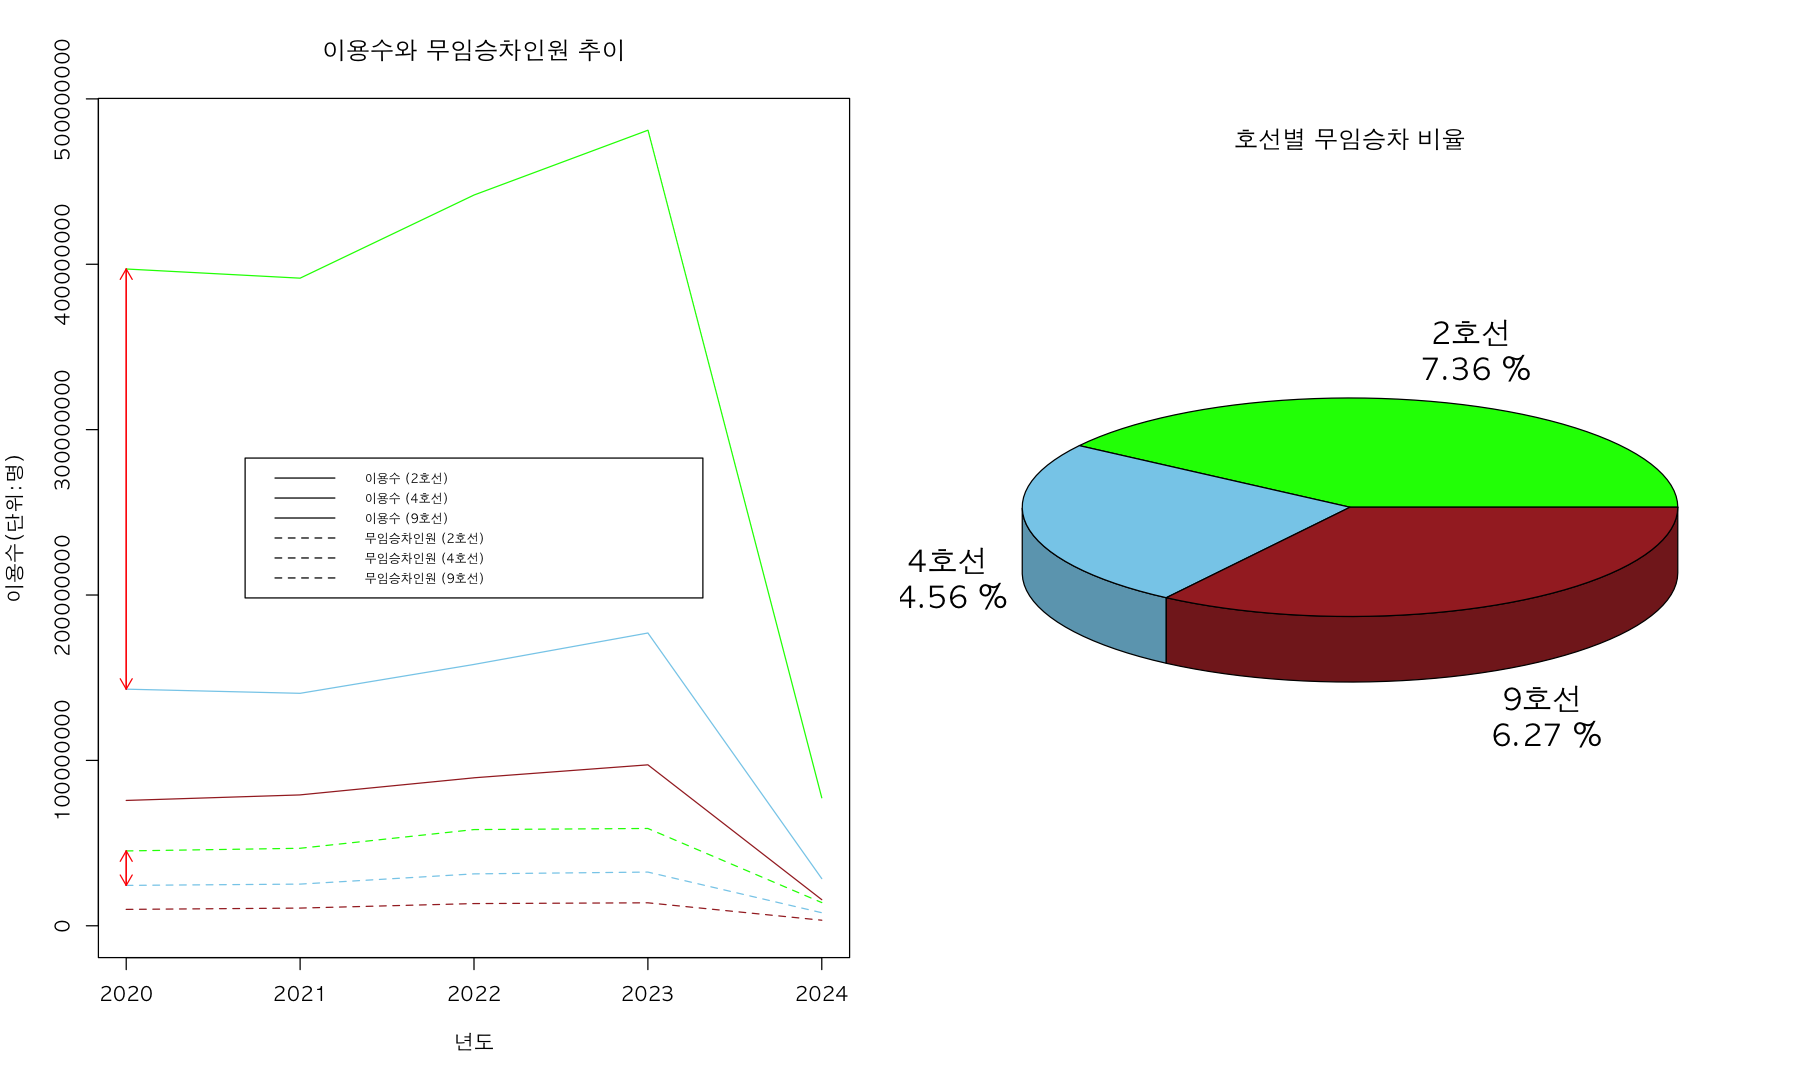

In [24]:
# 최종 결과 그래프
# 데이터프레임 생성
# 이렇게 안하고 싶은데 방법이 생각이안남 슬프다 
lin2user <- c(397139151, 391591285, 441861856, 481049461, 77384279)
lin2nopay <- c(45255901, 46862331, 58169517, 58838286, 14030639)

lin4user <- c(143091253, 140561197, 158029622, 177049585, 28502313)
lin4nopay <- c(24417915, 25196122, 31385199, 32471502, 7889481)

lin9user <- c(75789211, 79144963, 89484922, 97333692, 15785203)
lin9nopay <- c(9913095, 10698586, 13424751, 13888372, 3362042)

years <- 2020:2024

# 그래프 그리기
options(scipen = 100)
par(family = "AppleGothic", bg = 'white') 
par(mfrow = c(1,2))
plot(years, lin2user, type = "l", col = "green", xlab = "년도", ylab = "이용수(단위:명)", main = "이용수와 무임승차인원 추이", 
ylim = c(0, max(lin2user, lin2nopay, lin4user, lin4nopay, lin9user, lin9nopay)))
lines(years, lin2nopay, type = "l", col = "green", lty = 2)
lines(years, lin4user, type = "l", col = "skyblue")
lines(years, lin4nopay, type = "l", col = "skyblue", lty = 2)
lines(years, lin9user, type = "l", col = "brown")  
lines(years, lin9nopay, type = "l", col = "brown", lty = 2)
# 화살표 표시
arrows(years[1], lin4user[1], years[1], lin2user[1], col = "red", length = 0.1)
arrows(years[1], lin2user[1], years[1], lin4user[1], col = "red", length = 0.1)

arrows(years[1], lin4nopay[1], years[1], lin2nopay[1], col = "red", length = 0.1)
arrows(years[1], lin2nopay[1], years[1], lin4nopay[1], col = "red", length = 0.1)

legend( "center",legend = c("이용수 (2호선)", "이용수 (4호선)", "이용수 (9호선)", 
        "무임승차인원 (2호선)", "무임승차인원 (4호선)", "무임승차인원 (9호선)"), 
      col <- c("green","skyblue","brown","green","skyblue","brown"), lty = c(rep(1,3),rep(2,3)),
   cex = 0.6)   

library(plotrix)

pie3D(c(yumu2,yumu4,yumu9),
        main = "호선별 무임승차 비율",
        labels = c(paste("2호선\n",yumu2,"%"),paste("4호선\n",yumu4,"%"),paste("9호선\n",yumu9,"%")),
        col = c('green','skyblue','brown')
        )


#### 코로나 시기에는 이용자수가 줄다가 풀릴 때 우상향을 한다

### 2024 년도는 데이터가 2계월 뿐이라 값이 매우 적다

## 결론
- 3개의 호선을 비교한 결과, 2호선이 제일 이용자가 많고 무임승차 비율도 높다
- 하지만 9호선이 이용자가 제일 적지만 무임승차 비율은 이용자가 더 많은 4호선 보다 높다
- 이용자가 많다고해서 무임승차 비율이 높은건 아니다

### 추가하고싶은데 못한 기능
- 단위수를 나누어서 좀 작게 표현하고싶은데 그래프 단위랑 안맞아서 안보이는 문제 해결못함.
- dataset을 새로 만들어서 하나하나 적었는데 이걸 좀 세련되게 만들기
- 무임승차 비율과 지하철 편의시설의 호선별 설치 비율을 비교하고싶었으나 편의시설 데이터가 일부 역만 데이터만 있기때문에 포기
- 처음에는 1~9호선의 데이터를 가지고 비교를 하고싶었으나 진행중에 막혀서 3개만 뽑았음
- 그래프의 범례를 선그래프 중앙에 넣지말고 파이차트 아래, 선그래프 오른쪽 아래에다가 넣으면 좀더 보기좋을거같다

